# Project 2

# Supervised Learning - SVC Comparison

Objective: To train, and use hyperparameters in supervise learning. This project illustrate how data can be classified. It technically highlighs the effects/benefits of Normalization/Standardization.

## Part 1: Data Loading, Feature Selection, Cleaning, preprocessing to construct an input from Data Source

In [1]:
#importing relevant libraries
import pandas as pd
import numpy as np

 #to convert scientific output to float
np.set_printoptions(precision=20,suppress= False, formatter={'float_kind':'{:f}'.format})

 #to remove warning
import warnings 
warnings.filterwarnings('ignore')

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline


### 1. Load data.csv data file using pandas.

In [2]:
#loading data.csv to pandas dataframe
df = pd.read_csv('data.csv')

### 2. Print out some sample rows and inspect the data sample to identify the dependent variables and independent variables.

In [3]:
#printing out first 5 rows and all columns for inspection
df.head()

#The dependent variable is "diagnosis" and others columns are independent variables

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [4]:
df.shape  #This helps me see the shape of the dataframe/table in rows and columns

(569, 33)

### 3. Examine the values of each attribute and select a set of attributes that would only affect to predict dependent variable.

In [5]:
df.info()

#'id' and 'Unnamed: 32' type is String will not help in predicting the dependent variable.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 33 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

In [6]:
#we will drop 'id' and 'unnamed: 32', they have no use for machine learning

del df["Unnamed: 32"]
del df['id']

In [7]:
df.shape

(569, 31)

### 4. Split data between dependent (Y) and independent variables (X).

In [8]:
# y : dependent col ('diagnosis')
# X: independent col (the remaining col)

X, y = df.iloc[:, 1:].values, df.iloc[:, 0].values
#[:, 1:] : all rows then the second col to the end

### 5. Determine the data type (Discrete, Continuous, Categorical) of each attribute & Encode the dependent variable (as it is a string datatype) using a proper encoding scheme.


In [9]:
df.dtypes

#The dependent variable (diagnosis type) is int64 and is Categorical
#the x variables are Continuous

diagnosis                   object
radius_mean                float64
texture_mean               float64
perimeter_mean             float64
area_mean                  float64
smoothness_mean            float64
compactness_mean           float64
concavity_mean             float64
concave points_mean        float64
symmetry_mean              float64
fractal_dimension_mean     float64
radius_se                  float64
texture_se                 float64
perimeter_se               float64
area_se                    float64
smoothness_se              float64
compactness_se             float64
concavity_se               float64
concave points_se          float64
symmetry_se                float64
fractal_dimension_se       float64
radius_worst               float64
texture_worst              float64
perimeter_worst            float64
area_worst                 float64
smoothness_worst           float64
compactness_worst          float64
concavity_worst            float64
concave points_worst

<AxesSubplot:xlabel='diagnosis', ylabel='count'>

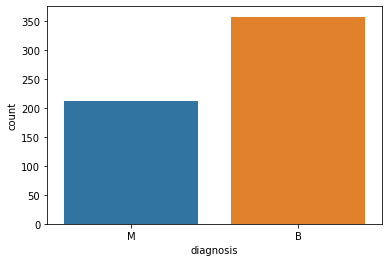

In [10]:
sns.countplot(df['diagnosis'], label="Count")

In [11]:
#importing sklearn
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

In [12]:
#We're converting our text categorical col (M or B) into numerical column (0,1)
#Encode label category
#M -> 1
#B -> 0

target_encoder = LabelEncoder()

y = target_encoder.fit_transform(y)

In [13]:
y

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1,
       0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1,
       0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1,
       1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0,
       0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1,
       1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1,

## Part 2: Scaling, Modeling and Hyper-parameter tuning.

### 6. Split the data into train and test data, with a ratio of 70% train and 30% test.
       


In [14]:
# We're splitting our data in to Train and Test part with 70% (X_train  and y_train ) 30% (X_test and y_test) test

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)
print(X_train.shape)

(398, 30)


### 7. Demonstrate results before and after using Standard Scaler. 



Should you fit any preprocessing algorithms on the whole dataset? No! We do not fit preprocessing algorithms on the whole dataset.

Why? 
During preprocessing it is important to use only the data relevant for machine learning for fitting. Fitting finds the internal parameters of a model that will be used to transform data. Those parameters to map new or existing values of x to the dependent variable, y.

In [15]:
#Predicting BEFORE Standard Scaler

from sklearn.svm import SVC
classifier = SVC()
classifier.fit(X_train,y_train)

#accuracy
classifier.score(X_test,y_test)

0.9181286549707602

In [16]:
#Transformation with Standard Scaler

from sklearn.preprocessing import StandardScaler

#Initializing the scaler function
scaler = StandardScaler()
X, y = df.iloc[:, 1:].values, df.iloc[:, 0].values

#Fit_transform

X = scaler.fit_transform(X)
target_encoder = LabelEncoder()

y = target_encoder.fit_transform(y)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)
print(X_train.shape)

(398, 30)


In [17]:
#Predicting AFTER Standard Scaler

classifier = SVC()
classifier.fit(X_train,y_train)
classifier.score(X_test,y_test)

0.9649122807017544

### 8. Also output classifier train and test accuracy scores and confusion matrix for each result.

##### Before standardizing

In [18]:
#Accuracy Scores before Standardizing
#LinearSVC accuracy scores

from sklearn.svm import LinearSVC,SVC
classifier = LinearSVC()

classifier.fit(X_train,y_train)


y_predict = classifier.predict(X_test)

#accuracy
classifier.score(X_test,y_test)

0.9649122807017544

In [19]:
#Confusion Matrix before Standardizing
from sklearn.metrics import confusion_matrix

print(confusion_matrix(y_predict,y_test))

[[104   2]
 [  4  61]]


In [20]:
#SVC accuracy scores before standardizing
classifier = SVC()
classifier.fit(X_train,y_train)# fitting data using SVC()
classifier.score(X_test,y_test)# #accuracy of svc() model

0.9649122807017544

##### After standardizing

In [21]:
#Accuracy Scores AFTER Standardizing
#LinearSVC accuracy scores

from sklearn.svm import LinearSVC,SVC
classifier = LinearSVC()

classifier.fit(X_train,y_train)


y_predict = classifier.predict(X_test)

#accuracy
classifier.score(X_test,y_test)

0.9649122807017544

In [22]:
#Confusion Matrix AFTER Standardizing
from sklearn.metrics import confusion_matrix

print(confusion_matrix(y_predict,y_test))

[[104   2]
 [  4  61]]


In [23]:
#SVC accuracy scores AFTER standardizing

classifier = SVC()
classifier.fit(X_train,y_train)
classifier.score(X_test,y_test)

#There is an improvement in accuracy after using Standard Scaling


0.9649122807017544

###   9. Finally perform Hyper-parameter tuning using GridSearchCV or RandomSearchCV, and note down the result train and test accuracies as well as the best parameters.
       Write Observations on benefits/disadvantages of Standardization/Normalization.


In [24]:
from sklearn.model_selection import GridSearchCV
import numpy as np


In [25]:
np.logspace(-3, 12, 15)
# Return numbers spaced evenly on a log scale. we are generation 15 numbers from -3 to 12 which are evenly distributed

array([0.001000, 0.011788, 0.138950, 1.637894, 19.306977, 227.584593,
       2682.695795, 31622.776602, 372759.372031, 4393970.560761,
       51794746.792312, 610540229.658531, 7196856730.011529,
       84834289824.407257, 1000000000000.000000])

In [26]:
np.logspace(-12, 5, 15)

array([0.000000, 0.000000, 0.000000, 0.000000, 0.000000, 0.000001,
       0.000019, 0.000316, 0.005179, 0.084834, 1.389495, 22.758459,
       372.759372, 6105.402297, 100000.000000])

In [27]:
C_range = np.logspace(-3, 12, 15)
gamma_range = np.logspace(-12, 5, 15)
#We are just creaing a dictionary
param_grid = dict( gamma=gamma_range,C=C_range)
#We've got a total of 15+15 = 30 hyperparameters, which make a total of 15*15=225 as our hyperparameter search space
#Using grid search we're searching for the model with the best score in this search space that has 225 combinations
 #Refit an estimator using the best found parameters on the whole dataset
grid = GridSearchCV(SVC(),refit = True, param_grid=param_grid)
#we fitting it to our data and searching for models of all combinations (169 combination)
grid.fit(X_train, y_train)

GridSearchCV(estimator=SVC(),
             param_grid={'C': array([0.001000, 0.011788, 0.138950, 1.637894, 19.306977, 227.584593,
       2682.695795, 31622.776602, 372759.372031, 4393970.560761,
       51794746.792312, 610540229.658531, 7196856730.011529,
       84834289824.407257, 1000000000000.000000]),
                         'gamma': array([0.000000, 0.000000, 0.000000, 0.000000, 0.000000, 0.000001,
       0.000019, 0.000316, 0.005179, 0.084834, 1.389495, 22.758459,
       372.759372, 6105.402297, 100000.000000])})

In [28]:
pd.DataFrame(grid.cv_results_)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_C,param_gamma,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.005413,0.000486,0.003394,0.000491,0.001,0.0,"{'C': 0.001, 'gamma': 1e-12}",0.625,0.625,0.625,0.632911,0.620253,0.625633,0.004077,96
1,0.004591,0.000477,0.003604,0.000494,0.001,0.0,"{'C': 0.001, 'gamma': 1.637893706954061e-11}",0.625,0.625,0.625,0.632911,0.620253,0.625633,0.004077,96
2,0.005202,0.000399,0.003800,0.000400,0.001,0.0,"{'C': 0.001, 'gamma': 2.6826957952797273e-10}",0.625,0.625,0.625,0.632911,0.620253,0.625633,0.004077,96
3,0.005598,0.000489,0.003802,0.000398,0.001,0.0,"{'C': 0.001, 'gamma': 4.393970560760786e-09}",0.625,0.625,0.625,0.632911,0.620253,0.625633,0.004077,96
4,0.005199,0.000400,0.003809,0.000405,0.001,0.0,"{'C': 0.001, 'gamma': 7.196856730011513e-08}",0.625,0.625,0.625,0.632911,0.620253,0.625633,0.004077,96
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
220,0.004995,0.000011,0.002201,0.000401,1000000000000.0,1.389495,"{'C': 1000000000000.0, 'gamma': 1.389495494373...",0.625,0.625,0.625,0.632911,0.620253,0.625633,0.004077,96
221,0.006597,0.000491,0.002810,0.000406,1000000000000.0,22.758459,"{'C': 1000000000000.0, 'gamma': 22.75845926074...",0.625,0.625,0.625,0.632911,0.620253,0.625633,0.004077,96
222,0.006992,0.000891,0.003805,0.000763,1000000000000.0,372.759372,"{'C': 1000000000000.0, 'gamma': 372.7593720314...",0.625,0.625,0.625,0.632911,0.620253,0.625633,0.004077,96
223,0.012198,0.000738,0.005196,0.001718,1000000000000.0,6105.402297,"{'C': 1000000000000.0, 'gamma': 6105.402296585...",0.625,0.625,0.625,0.632911,0.620253,0.625633,0.004077,96


In [29]:
print("The best parameters are %s with a score of %0.2f"
      % (grid.best_params_, grid.best_score_))

The best parameters are {'C': 31622.776601683792, 'gamma': 1.9306977288832455e-05} with a score of 0.98


#### Observations on benefits/disadvantages of Standardization/Normalization

Standardization is great to use as our data follows a normal distribution which is clearly understandable from the df.describe() table. Our data is not influenced by the maximum or minimum value which does not have a bounding range.